In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import joblib
import tensorflow as tf 
from tensorflow.compat.v1 import ConfigProto, Session
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
file_path = "./Kaggle_Data/songs.csv"

songs_df = pd.read_csv(file_path)

In [3]:
songs_df = songs_df[(songs_df['popularity'] > 20)]
songs_df = songs_df[(songs_df['year'] > 1959)]



songs_df.index = songs_df['id']
song_names = songs_df['name']
artists = songs_df['artists']
song_year = songs_df['year'] 
X = songs_df.drop(columns=['id', 'name', 'release_date',
                                  'artists', 'popularity', 'duration_ms',
                                  'explicit', 'year'])
y = songs_df['popularity']

In [4]:
songs_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
id,,,,,,,,,,,,,,,,,,,
14KYHUXP10UdTx4RawPF65,0.5890,['Enrique Guzman'],0.617,121160,0.815,0,14KYHUXP10UdTx4RawPF65,0.000366,4,0.1230,-8.724,1,Oye Niña (Let's Dance),25,1960,0.0410,85.041,0.964,1960
67LQpgGMjI0jnXo9lRj07C,0.8920,['Nelson Gonçalves'],0.596,185667,0.314,0,67LQpgGMjI0jnXo9lRj07C,0.000001,9,0.1680,-10.024,0,A Volta do Boêmio,42,1960,0.0290,99.442,0.599,1960
6punhea3aLO1amgBFe5Onz,0.6100,['Enrique Guzman'],0.312,172667,0.372,0,6punhea3aLO1amgBFe5Onz,0.000000,5,0.3800,-9.472,1,Gracias por el Recuerdo (Thanks for the Memory),28,1960,0.0273,82.965,0.332,1960
7yjnEE3OeagYs8QI8cQYcH,0.8520,['Los Blue Caps'],0.228,139933,0.670,0,7yjnEE3OeagYs8QI8cQYcH,0.026900,6,0.1770,-9.893,0,¿Por Qué Te Amo? - Why Do I Love You So,23,1960,0.0459,67.792,0.520,1960
1kQa6xtxhxrpLrCBgV5v7r,0.5580,['Los Teen Tops'],0.476,121027,0.923,0,1kQa6xtxhxrpLrCBgV5v7r,0.000000,9,0.1570,-6.077,1,Rey Criollo - King Creole (Remasterizado),25,1960,0.0850,90.129,0.808,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4KppkflX7I3vJQk7urOJaS,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.443,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.306,2020
1ehhGlTvjtHo2e4xJFB0SZ,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.385,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.270,2020
52eycxprLhK3lPcRLbQiVk,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.539,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.153,2020


In [5]:
X.shape, y.shape

((113126, 11), (113126,))

In [6]:
X = X.to_numpy()

y = y.to_numpy()

In [7]:
max_val = 0
for x in X:
    if x.max() > max_val:
        max_val = x.max()

X_norm = X.astype('float')/max_val

In [8]:
X_train = X_norm[:100000]
X_test = X_norm[100001:]

y_train = y[:100000]
y_test = y[100001:]

In [9]:
input_dim = 11

model1 = Sequential([
    Dense(32, activation='relu', input_dim=input_dim),
    Dense(16, activation='relu'),
    Dense(1)
])

model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), 
              loss='mean_squared_error',
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [10]:
config = ConfigProto(device_count={"GPU": 0})
session = Session(config=config)

stop = EarlyStopping(patience = 10)

model1.fit(
    X_train, y_train,
    batch_size=64,
    validation_split=0.2,
    shuffle=True,
    epochs=100,
    workers=15,
    callbacks=[stop]
)

Epoch 1/100
1250/1250 [==============================] - 1s 866us/step - loss: 518.2124 - root_mean_squared_error: 22.7643 - val_loss: 140.4788 - val_root_mean_squared_error: 11.8524
Epoch 2/100
1250/1250 [==============================] - 1s 777us/step - loss: 196.5094 - root_mean_squared_error: 14.0182 - val_loss: 125.7206 - val_root_mean_squared_error: 11.2125
Epoch 3/100
1250/1250 [==============================] - 1s 783us/step - loss: 187.7529 - root_mean_squared_error: 13.7023 - val_loss: 120.9133 - val_root_mean_squared_error: 10.9961
Epoch 4/100
1250/1250 [==============================] - 1s 788us/step - loss: 184.2267 - root_mean_squared_error: 13.5730 - val_loss: 122.3272 - val_root_mean_squared_error: 11.0602
Epoch 5/100
1250/1250 [==============================] - 1s 779us/step - loss: 181.4703 - root_mean_squared_error: 13.4711 - val_loss: 115.6423 - val_root_mean_squared_error: 10.7537
Epoch 6/100
1250/1250 [==============================] - 1s 780us/step - loss: 178.23

In [11]:
pred = model1.predict(X)

In [12]:
pred.shape

(113126, 1)

In [13]:
song_year = song_year.to_numpy().reshape(-1, 1)

In [14]:
song_year.shape

(113126, 1)

In [15]:
knn_features = np.stack((pred, song_year), axis=1).reshape(-1, 2)

In [16]:
knn_features

array([[ 136.72824097, 1960.        ],
       [ 920.6918335 , 1960.        ],
       [ 475.4395752 , 1960.        ],
       ...,
       [1382.9979248 , 2020.        ],
       [1157.46728516, 2020.        ],
       [ 719.86669922, 2020.        ]])

In [17]:
nn = NearestNeighbors(n_neighbors=10)

knn = nn.fit(knn_features)

In [18]:
test = knn_features[0].reshape(1, -1)

dist, index = knn.kneighbors(test) 

In [19]:
for i in index:
    print(song_names[i])



id
14KYHUXP10UdTx4RawPF65                               Oye Niña (Let's Dance)
6IOnUNpll37ONAgshDwa5B          Let's Get Together - From "The Parent Trap"
2xWYWJV1WLfrFe5uSr3Jcv                                         Little Devil
78JtnRNK4t1IeywZx5F1rx                   Quién Puso el Bomp - Remasterizado
7hBGIBruVeE1UTxv2heeP9                                Take Me For What I Am
2MjjhZpqzlOoDCb0wbIFsU                              Twistin' The Night Away
6psYpUSDyjlkSzFtgcGURp                              Lipstick On Your Collar
6A3rHCtV9sP5aRvBDth3wB    Buen Rock Esta Noche - Good Rockin' Tonight [R...
6U3Az2TWNkjzeqV5RztJw7          Presumida - High Class Baby [Remasterizado]
3aXSKGqHUGXWPfBcpl1C8I                                     Samba do Carioca
Name: name, dtype: object


In [20]:
dist

array([[0.        , 2.18667983, 2.75007629, 3.1302948 , 3.92043572,
        4.65057801, 5.26199354, 6.13529968, 6.23010254, 6.95787915]])

In [21]:
song_names[0]

"Oye Niña (Let's Dance)"

In [22]:
test = np.array([0.0529, 0.664, 0.602, 0, 4, 0.356, -5.369, 0, 0.0412, 134.049, 0.289])

In [23]:
test_norm = test.astype('float')/max_val

In [24]:
X_train[0]

array([ 2.41303448e-03,  2.52774580e-03,  3.33891868e-03,  1.49944078e-06,
        1.63873310e-02,  5.03910427e-04, -3.57407688e-02,  4.09683274e-03,
        1.67970142e-04,  3.48398753e-01,  3.94934676e-03])

In [25]:
test2 = model1.predict(test_norm.reshape(1,-1))
test2 = np.array([test2[0][0], 2016])

In [26]:
dist, index = knn.kneighbors(test2.reshape(1, -1)) 

In [27]:
for i in index:
    print(song_names[i])
    
dist

id
5Ma3BlNVDtn3JiwMEafSaq                                               Single
0s77V2jfwyd8Mz5YHFXPJi    Summer Jam (feat. Florida Georgia Line) (feat....
1qOjhG2mkc7NtDYfrh30MW                                              América
4rc2WNOt2w8BHfQjBC8PO0                                     We Own The Night
4TQOC2AhsD96oPxAC6NB6w    Take Me There - From "The Rugrats Movie" Sound...
0gEQuV07NblpCGECSGqczG                                   A Ti Te da Besitos
0M5pEUmRD3b4nP31L88IdL                                            Why Worry
2q4F6OpQgx9umNB9uGFPYo                                  RATCHET SATURN GIRL
6DWntCW0Z8ZyNgDoPojfpW                              Whatcha Know 'Bout That
6U9ugzM29qVCHj2z2AFXk3                      It's Thunder and It's Lightning
Name: name, dtype: object


array([[1.95345416, 4.15767854, 5.03830497, 5.47221997, 5.59539144,
        5.73059827, 6.49030334, 6.54998869, 6.73353101, 7.00897436]])

In [28]:
dist, index = knn.kneighbors(knn_features[:1000], 2)

In [29]:
dist = np.delete(dist, 0, axis=1)
y = np.array(list(range(0, 1000))).reshape(1000, 1)

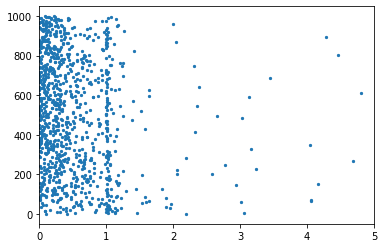

In [30]:
fig, ax = plt.subplots()

ax.scatter(dist, y, s=5)
plt.xlim(0, 5)

plt.show()

In [31]:
model1.save('./nn_model')

INFO:tensorflow:Assets written to: ./nn_model\assets


In [32]:
model = tf.keras.models.load_model('./nn_model')

In [33]:
test_load = model.predict(test_norm.reshape(1,-1))
test_year = 2016

In [34]:
joblib.dump(knn, filename='knn.gz', compress=3)

['knn.gz']

In [35]:
test_load_input = np.array([test_load[0][0], test_year])

In [36]:
knn.kneighbors(test_load_input.reshape(1, -1)) 

(array([[1.95345416, 4.15767854, 5.03830497, 5.47221997, 5.59539144,
         5.73059827, 6.49030334, 6.54998869, 6.73353101, 7.00897436]]),
 array([[101165,  10418,  21403,  77317,  10336,  42973,  11200,  11075,
         112840,  42532]], dtype=int64))